In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [12]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in e:\programas\anaconda\lib\site-packages (0.23.2)


In [13]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in e:\programas\anaconda\lib\site-packages (1.2.0)


In [14]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in e:\programas\anaconda\lib\site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [15]:
import pandas as pd

In [16]:
!pip install Cloudant

from cloudant import  Cloudant

u = '1792e406-7a44-480c-a923-a4c7399297da-bluemix'
p = '5a3ee880f60b2ab37d8241b4424549a533202059a3fa107d0dfd56ffbc34c426'
a = '1792e406-7a44-480c-a923-a4c7399297da-bluemix'
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

db = client['gama-iot']

response = db.all_docs(limit=20000, include_docs=True)

docs = []
for r in response['rows']:
    docs.append(r['doc'])
type(docs)

import pandas as pd
pd.set_option('display.max_rows', None)

df = pd.DataFrame(data=docs)

dt = df.drop_duplicates()
dt = dt.sort_values(by=['row'])

dt.to_csv(r'meu_banco.csv', index = False)

df_data_1 = pd.read_csv(r'meu_banco.csv')

In [17]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
18494,602ce3e17beab8a6c50dd92c54ee7e08,1-e496cdbefbaf8c226c304099e095cb10,2019-12-27,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER,17013
18495,6bfa1c588abbd754ef26e9c49e0098a5,1-391d9546fda7a126f5e6b243852c6ee2,2019-12-28,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL,17014
18496,a15e0e2c3b68aa19ecace6eb6c31a0d5,1-95c490eb796f4c45672e2692fe912cc9,2019-12-29,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL,17015
18497,5868c552e3dc194a6e14c4f9fe77f7ae,1-c00d7d7548801a84416ee24f453cba41,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL,17016
18498,7ca31920c58ace710c419f6232ba7c0e,1-c00d7d7548801a84416ee24f453cba41,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL,17016


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [18]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18499 entries, 0 to 18498
Data columns (total 17 columns):
_id             18499 non-null object
_rev            18499 non-null object
Tempo           18499 non-null object
Estação         18499 non-null object
LAT             18499 non-null float64
LONG            18499 non-null float64
Movimentação    18499 non-null int64
Original_473    18499 non-null int64
Original_269    18499 non-null int64
Zero            18499 non-null int64
Maçã-Verde      18499 non-null int64
Tangerina       18499 non-null int64
Citrus          18499 non-null int64
Açaí-Guaraná    18499 non-null int64
Pêssego         18499 non-null int64
TARGET          18499 non-null object
row             18499 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 2.4+ MB


In [19]:
df_training_dataset.nunique()

_id             18499
_rev            11521
Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    10531
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
row             11521
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [21]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [22]:
df_training_dataset_imputed.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
18494,602ce3e17beab8a6c50dd92c54ee7e08,1-e496cdbefbaf8c226c304099e095cb10,2019-12-27,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER,17013
18495,6bfa1c588abbd754ef26e9c49e0098a5,1-391d9546fda7a126f5e6b243852c6ee2,2019-12-28,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL,17014
18496,a15e0e2c3b68aa19ecace6eb6c31a0d5,1-95c490eb796f4c45672e2692fe912cc9,2019-12-29,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL,17015
18497,5868c552e3dc194a6e14c4f9fe77f7ae,1-c00d7d7548801a84416ee24f453cba41,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL,17016
18498,7ca31920c58ace710c419f6232ba7c0e,1-c00d7d7548801a84416ee24f453cba41,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL,17016


In [27]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação','_id', '_rev', 'row'], inplace=False)

In [28]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
18494,43,52,17,33,18,21,5,35,REABASTECER
18495,34,50,9,28,15,16,43,32,NORMAL
18496,22,47,65,27,11,16,39,30,NORMAL
18497,9,42,56,22,8,10,35,26,NORMAL
18498,9,42,56,22,8,10,35,26,NORMAL


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [33]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['TARGET'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
18494,43,52,17,33,18,21,5,35,REABASTECER
18495,34,50,9,28,15,16,43,32,NORMAL
18496,22,47,65,27,11,16,39,30,NORMAL
18497,9,42,56,22,8,10,35,26,NORMAL
18498,9,42,56,22,8,10,35,26,NORMAL


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [34]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [35]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(n_jobs=2, sampling_strategy='all', random_state=None)

In [97]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=39)
X_trainb, y_trainb = smote.fit_resample(X_train, y_train)

### Treinando uma árvore de decisão

In [125]:
xgb = XGBClassifier(learning_rate=0.10, max_depth=20, min_child_weight=15, n_estimators=200, nthread=2, subsample=0.55)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=15, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, nthread=2, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.55, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Fazendo previsões na amostra de teste

In [126]:
y_pred = xgb.predict(X_test)
print(y_pred)

['NORMAL' 'REABASTECER' 'NORMAL' ... 'NORMAL' 'REABASTECER' 'NORMAL']


In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score(y_test, y_pred)

0.843079443079443

### Analisando a qualidade do modelo através da matriz de confusão

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

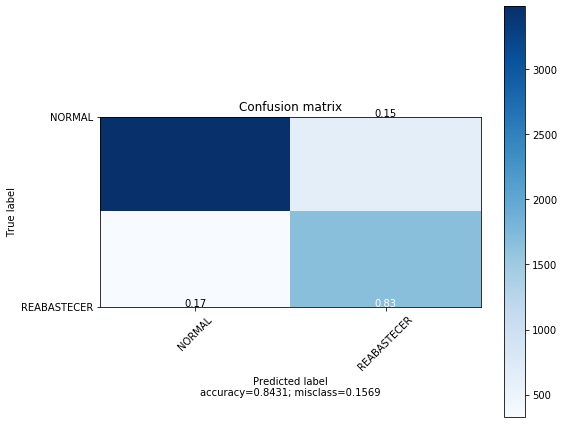

In [130]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

In [ ]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação','_id', '_rev', 'row'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = xgb.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
